## Assignment 1

**Submission deadlines:**
- get at least **2** points by Tuesday, 11.03.2025
- remaining points: last lab session before or on Tuesday, 18.03.2025

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and answers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$.

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import torch

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

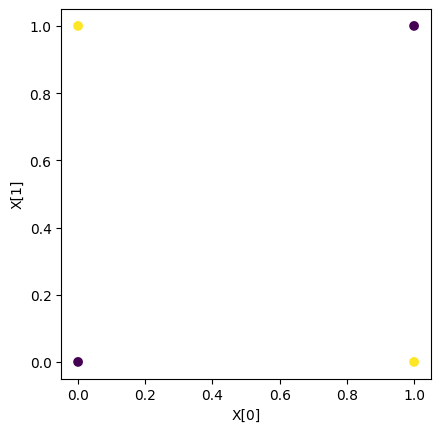

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
# Y is a matrix of N numners - answers
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


class SmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float64):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * 0.5
        self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * 0.5
        self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * 0.5
        self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * 0.5

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X @ self.W1.t() + self.b1 # @ is matrix mult, can use also torch.mm(), torch.matmul()
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.t() + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -(Y * torch.log(O2) + (1 - Y) * torch.log(1 - O2))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            A2_grad = (O2 -  Y) / X.shape[0] #
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.t() @ O1 #
            O1_grad = A2_grad @ self.W2 #
            A1_grad = O1_grad * O1 * (1 - O1) #
            self.b1_grad = A1_grad.sum(0) #
            self.W1_grad = A1_grad.t() @ X #

        return O2, loss

In [ ]:
# TODO Problem 1:
# Set the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=torch.float64)
net.W1 = torch.tensor([[20, 20],[-20, -20]], dtype=torch.float64)
net.b1 = torch.tensor([-10, 30], dtype=torch.float64)
net.W2 = torch.tensor([[20, 20]], dtype=torch.float64)
net.b2 = torch.tensor([-30], dtype=torch.float64)

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 4.543910487654591e-05
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.999954519621495
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.999954519621495
XORnet(tensor([1., 1.], dtype=torch.float64)) = 4.543910487654591e-05


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = torch.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i].item()
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert torch.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    print(param_name, check_grad(net, param_name, X, Y))

W1 (tensor([[-7.1607e-05, -1.6362e-04],
        [ 2.5867e-03,  2.4631e-03]], dtype=torch.float64), tensor([[-7.1607e-05, -1.6362e-04],
        [ 2.5867e-03,  2.4631e-03]], dtype=torch.float64))
b1 (tensor([-0.0002,  0.0057], dtype=torch.float64), tensor([-0.0002,  0.0057], dtype=torch.float64))
W2 (tensor([[0.0175, 0.0192]], dtype=torch.float64), tensor([[0.0175, 0.0192]], dtype=torch.float64))
b2 (tensor([0.0513], dtype=torch.float64), tensor([0.0513], dtype=torch.float64))


## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=torch.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.7107412485343869
after 5000 steps 	loss=0.02686329219202839
after 10000 steps 	loss=0.008035041445447888
after 15000 steps 	loss=0.004548306754412755
after 20000 steps 	loss=0.003132272217896531
after 25000 steps 	loss=0.0023736551356299367
after 30000 steps 	loss=0.001903670165273402
after 35000 steps 	loss=0.0015850537198827794
after 40000 steps 	loss=0.0013553654033298004
after 45000 steps 	loss=0.0011822264864980324
after 50000 steps 	loss=0.0010472131759851567
after 55000 steps 	loss=0.0009390878084051054
after 60000 steps 	loss=0.0008506152173563357
after 65000 steps 	loss=0.0007769310549365063
after 70000 steps 	loss=0.0007146467893682896
after 75000 steps 	loss=0.0006613309740029275
after 80000 steps 	loss=0.0006151945476120258
after 85000 steps 	loss=0.0005748924187575812
after 90000 steps 	loss=0.0005393941780370344
after 95000 steps 	loss=0.0005078974190415761


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.00020701555692647223
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.9994837537001141
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.9995023319885902
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.0006976207122033597


In [ ]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.
X3 = torch.tensor([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=torch.float64)
Y3 = (X3.sum(dim=1) % 2).unsqueeze(1).double() # 1 if number of 1s in vector is odd, else 0


for hidden_dim in [  2,3,5, 10, 20]:
    net = SmallNet(3, hidden_dim, dtype=torch.float64)
    alpha = 0.1  # set a learning rate
    print("hidden dimension:", hidden_dim)

    for i in range(100000):
      _, loss = net.forward(X3, Y3, do_backward=True)
      if (i % 5000) == 0:
          print(f"after {i} steps \tloss={loss}")

      for param_name in ["W1", "b1", "W2", "b2"]:
          param = getattr(net, param_name)
          # Hint: use the construct `param[:]` to change the contents of the array!
          # Doing instead `param = new_val` simply changes to what the variable
          # param points to, without affecting the network!
          # alternatively, you could do setattr(net, param_name, new_value)
          param[:] = param - alpha * getattr(net, param_name + "_grad")

    pass

    # 2 is not reliable, but sometimes possible (once per few random inits it finds good optimum fast, sometimes it takes a lot of steps, sometimes it just stops at big loss)
    # 3 is more reliable, , 5 is ok (usually after 20-30k steps we have loss <0.01)
    # 10 and 20 are most reliable


hidden dimension: 2
after 0 steps 	loss=0.7009088592918398
after 5000 steps 	loss=0.6927589725418493
after 10000 steps 	loss=0.6263747224792343
after 15000 steps 	loss=0.3154640439951313
after 20000 steps 	loss=0.18489683353766156
after 25000 steps 	loss=0.12425451706388896
after 30000 steps 	loss=0.09210609734099241
after 35000 steps 	loss=0.07265905600595024
after 40000 steps 	loss=0.05977041140860212
after 45000 steps 	loss=0.0506555218810605
after 50000 steps 	loss=0.04389272658634456
after 55000 steps 	loss=0.03868757302970485
after 60000 steps 	loss=0.03456392238996348
after 65000 steps 	loss=0.03122013487406107
after 70000 steps 	loss=0.028456340705524594
after 75000 steps 	loss=0.026135106914608755
after 80000 steps 	loss=0.02415895400539333
after 85000 steps 	loss=0.022456893964010658
after 90000 steps 	loss=0.02097604599915862
after 95000 steps 	loss=0.019676235005632408
hidden dimension: 3
after 0 steps 	loss=0.6976969239869882
after 5000 steps 	loss=0.6930826278098285
after

## Problem 4


In [ ]:
import torch
# Then estimate the success rate of training the network with diferent
# hidden sizes.
X3 = torch.tensor([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=torch.float64)
Y3 = (X3.sum(dim=1) % 2).unsqueeze(1).double() # 1 if number of 1s in vector is odd, else 0
def relu(x):
    return torch.max(x, torch.zeros_like(x))
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


class ReluSmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float64):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * 0.5
        self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * 0.5
        self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * 0.5
        self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * 0.5

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X @ self.W1.t() + self.b1 # @ is matrix mult, can use also torch.mm(), torch.matmul()
        # Outputs after the RELU! non-linearity
        O1 = relu(A1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.t() + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -(Y * torch.log(O2) + (1 - Y) * torch.log(1 - O2))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
          # Gradient funkcji kosztu względem A2
          A2_grad = (O2 - Y) / X.shape[0]
          self.b2_grad = A2_grad.sum(0)
          self.W2_grad = A2_grad.t() @ O1

          # Propagacja gradientu do warstwy poprzedniej
          O1_grad = A2_grad @ self.W2

          # Pochodna funkcji ReLU: 1 dla A1 > 0, 0 w przeciwnym przypadku.
          relu_grad = (A1 > 0).type(O1_grad.dtype)
          A1_grad = O1_grad * relu_grad

          self.b1_grad = A1_grad.sum(0)
          self.W1_grad = A1_grad.t() @ X

        return O2, loss


for hidden_dim in [5,6,7,8,9,10, 20]:
    net = ReluSmallNet(3, hidden_dim, dtype=torch.float64)
    alpha = 0.1  # set a learning rate
    print("hidden dimension:", hidden_dim)

    for i in range(100000):
      _, loss = net.forward(X3, Y3, do_backward=True)
      if (i % 5000) == 0:
          print(f"after {i} steps \tloss={loss}")

      for param_name in ["W1", "b1", "W2", "b2"]:
          param = getattr(net, param_name)
          # Hint: use the construct `param[:]` to change the contents of the array!
          # Doing instead `param = new_val` simply changes to what the variable
          # param points to, without affecting the network!
          # alternatively, you could do setattr(net, param_name, new_value)
          param[:] = param - alpha * getattr(net, param_name + "_grad")

    pass

hidden dimension: 5
after 0 steps 	loss=1.0574076328328843
after 5000 steps 	loss=0.5414722390821947


KeyboardInterrupt: 

## Problem 5

In [ ]:
def relu(x):
    return torch.max(x, torch.zeros_like(x))


class ReluSmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float64):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((num_hidden, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((num_hidden,), dtype=dtype)
        self.W3 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b3 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * 0.5
        self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * 0.5
        self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * 0.5
        self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * 0.5
        self.W3 = torch.randn(self.W3.shape, dtype=self.W3.dtype) * 0.5
        self.b3 = torch.randn(self.b3.shape, dtype=self.b3.dtype) * 0.5

    def forward(self, X, Y=None, do_backward=False):
        # Input to neurons in 1st layer
        A1 = X @ self.W1.t() + self.b1 # @ is matrix mult, can use also torch.mm(), torch.matmul()
        # Outputs after the RELU! non-linearity
        O1 = relu(A1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.t() + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)
        # add second hidden layer
        A3 = O2 @ self.W3.t() + self.b3
        O3 = sigmoid(A3)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -(Y * torch.log(O3) + (1 - Y) * torch.log(1 - O3))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
          dA3 = (O3 - Y) / X.shape[0]
          self.b3_grad = dA3.sum(0)
          self.W3_grad = dA3.t() @ O2

          dO2 = dA3 @ self.W3
          dA2 = dO2 * (O2 * (1 - O2))
          self.b2_grad = dA2.sum(0)
          self.W2_grad = dA2.t() @ O1

          dO1 = dA2 @ self.W2
          # Pochodna ReLU: 1 gdy A1 > 0, 0 w przeciwnym przypadku
          dA1 = dO1 * ((A1 > 0).type(dO1.dtype))
          self.b1_grad = dA1.sum(0)
          self.W1_grad = dA1.t() @ X

        return O2, loss


for hidden_dim in [2,3,5,10]:
    net = ReluSmallNet(3, hidden_dim, dtype=torch.float64)
    alpha = 0.1  # set a learning rate
    print("hidden dimension:", hidden_dim)

    for i in range(100000):
      _, loss = net.forward(X3, Y3, do_backward=True)
      if (i % 5000) == 0:
          print(f"after {i} steps \tloss={loss}")

      for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
          param = getattr(net, param_name)
          param[:] = param - alpha * getattr(net, param_name + "_grad")

    pass

hidden dimension: 2
after 0 steps 	loss=0.7264404933023535
after 5000 steps 	loss=0.5668072628850113
after 10000 steps 	loss=0.5246855784502873
after 15000 steps 	loss=0.5225012089672663
after 20000 steps 	loss=0.5216760519234611
after 25000 steps 	loss=0.5212495023311439
after 30000 steps 	loss=0.5209888805258398
after 35000 steps 	loss=0.5208092341229167
after 40000 steps 	loss=0.5206742415519746
after 45000 steps 	loss=0.5205798848407005
after 50000 steps 	loss=0.5204988340090192
after 55000 steps 	loss=0.5204426551986225
after 60000 steps 	loss=0.5203845131666662
after 65000 steps 	loss=0.5203431248193825
after 70000 steps 	loss=0.520304503380098
after 75000 steps 	loss=0.5202795691005725
after 80000 steps 	loss=0.5202490713541541
after 85000 steps 	loss=0.5202231731562624
after 90000 steps 	loss=0.5202041892728433
after 95000 steps 	loss=0.5201840709105666
hidden dimension: 3
after 0 steps 	loss=0.758053603242525
after 5000 steps 	loss=0.009078600311479564
after 10000 steps 	loss=

## Problem 6

In [ ]:
import torch

def relu(x):
    return torch.max(x, torch.zeros_like(x))

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

class VariableDepthNet:
  def __init__(self, in_features: int, num_hidden: int, num_hidden_layers: int,
              activation: str = 'relu', dtype=torch.float64):
    """
    Parametry:
      - in_features: wymiar wejścia,
      - num_hidden: liczba neuronów w każdej warstwie ukrytej,
      - num_hidden_layers: liczba warstw ukrytych,
      - activation: funkcja aktywacyjna ('relu' lub 'sigmoid')
    """
    self.in_features = in_features
    self.num_hidden = num_hidden
    self.num_hidden_layers = num_hidden_layers
    self.activation = activation

    #wagi i biasy przechowujemy w arrayu
    self.W_hidden = []
    self.b_hidden = []

    for i in range(num_hidden_layers):
        prev_dim = in_features if i == 0 else num_hidden
        W = torch.zeros((num_hidden, prev_dim), dtype=dtype)
        b = torch.zeros((num_hidden,), dtype=dtype)
        self.W_hidden.append(W)
        self.b_hidden.append(b)

    #warstwa wyjsciowa
    self.W_out = torch.zeros((1, num_hidden), dtype=dtype)
    self.b_out = torch.zeros((1,), dtype=dtype)

    self.W_hidden_grad = [None] * num_hidden_layers
    self.b_hidden_grad = [None] * num_hidden_layers
    self.W_out_grad = None
    self.b_out_grad = None

    self.init_params()


  def init_params(self):
    for i in range(self.num_hidden_layers):
        self.W_hidden[i] = torch.randn(self.W_hidden[i].shape, dtype=self.W_hidden[i].dtype) * 0.5
        self.b_hidden[i] = torch.randn(self.b_hidden[i].shape, dtype=self.b_hidden[i].dtype) * 0.5
    self.W_out = torch.randn(self.W_out.shape, dtype=self.W_out.dtype) * 0.5
    self.b_out = torch.randn(self.b_out.shape, dtype=self.b_out.dtype) * 0.5


  def forward(self, X, Y=None, do_backward=False):
    #warstwa ukryta
    A_hidden = []
    O_hidden = []
    prev = X

    for i in range(self.num_hidden_layers):
      A = prev @ self.W_hidden[i].t() + self.b_hidden[i]
      if self.activation == 'relu':
        O = relu(A)
      elif self.activation == 'sigmoid':
        O = sigmoid(A)
      A_hidden.append(A)
      O_hidden.append(O)
      prev = O

    #warstwa wyjsciowa
    A_out = prev @ self.W_out.t() + self.b_out
    O_out = sigmoid(A_out)

    if Y is not None:
      loss = -(Y * torch.log(O_out) + (1 - Y) * torch.log(1 - O_out))
      loss = loss.sum() / X.shape[0]
    else:
      loss = torch.nan

    if do_backward:
      #warstwa wyjsciowa
      dA_out = (O_out - Y) / X.shape[0]
      self.b_out_grad = dA_out.sum(0)
      self.W_out_grad = dA_out.t() @ O_hidden[-1]
      d_hidden = dA_out @ self.W_out

      # przez wszystkie warstwy ukryte backprop
      for i in reversed(range(self.num_hidden_layers)):
        A = A_hidden[i]
        O = O_hidden[i]
        if self.activation == 'relu':
          dA = d_hidden * (A > 0).type(d_hidden.dtype)
        elif self.activation == 'sigmoid':
          dA = d_hidden * (O * (1 - O))


        if i == 0:
          prev = X
        else:
          prev = O_hidden[i - 1]
        self.b_hidden_grad[i] = dA.sum(0)
        self.W_hidden_grad[i] = dA.t() @ prev
        d_hidden = dA @ self.W_hidden[i]

    return O_out, loss







In [ ]:
# Przykład eksperymentu – trening dla różnych głębokości sieci:
# Zakładamy, że mamy dane X_data (wymiar [N, in_features]) oraz Y_data (wymiar [N, 1])
# Poniżej przykład dla problemu 3D XOR (N = 8, in_features = 3)
X3 = torch.tensor([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=torch.float64)
Y3 = (X3.sum(dim=1) % 2).unsqueeze(1).double()

# Ustawienia treningu:
alpha = 0.1
num_epochs = 30000  # przykładowa liczba epok

# Przetestujemy sieć dla różnych głębokości:
for num_layers in [1, 2, 3, 5, 10]:
    print(f"\nTraining network with {num_layers} hidden layer(s) using ReLU")
    net = VariableDepthNet(in_features=3, num_hidden=10, num_hidden_layers=num_layers,
                           activation='relu', dtype=torch.float64)
    for epoch in range(num_epochs+1):
        preds, loss = net.forward(X3, Y3, do_backward=True)
        if epoch % 5000 == 0:
            print(f"Epoch {epoch}: loss = {loss}")
        # Aktualizacja wag – wszystkie parametry są aktualizowane in-place:
        for i in range(net.num_hidden_layers):
            net.W_hidden[i][:] = net.W_hidden[i] - alpha * net.W_hidden_grad[i]
            net.b_hidden[i][:] = net.b_hidden[i] - alpha * net.b_hidden_grad[i]
        net.W_out[:] = net.W_out - alpha * net.W_out_grad
        net.b_out[:] = net.b_out - alpha * net.b_out_grad

    with torch.no_grad():
        preds, loss = net.forward(X3, Y3, do_backward=False)
        preds_binary = (preds >= 0.5).double()
        accuracy = (preds_binary == Y3).double().mean().item()
        print(f"Final accuracy: {accuracy}")


Training network with 1 hidden layer(s) using ReLU
Epoch 0: loss = 0.6849024689387271
Epoch 5000: loss = 0.006035733502334719
Epoch 10000: loss = 0.002170632970276613
Epoch 15000: loss = 0.001257065988193211
Epoch 20000: loss = 0.0008659468594942663
Epoch 25000: loss = 0.0006530822459173834
Epoch 30000: loss = 0.0005204202535263375
Final accuracy: 1.0

Training network with 2 hidden layer(s) using ReLU
Epoch 0: loss = 0.859403386968152
Epoch 5000: loss = 0.002644121149400578
Epoch 10000: loss = 0.0012371489540234876
Epoch 15000: loss = 0.0008034703897049696
Epoch 20000: loss = 0.0005936727431341089
Epoch 25000: loss = 0.00047020380577435965
Epoch 30000: loss = 0.00038889420987997053
Final accuracy: 1.0

Training network with 3 hidden layer(s) using ReLU
Epoch 0: loss = 0.730216461950759
Epoch 5000: loss = 0.0001457318007353367
Epoch 10000: loss = 5.995700907596479e-05
Epoch 15000: loss = 3.626971486159136e-05
Epoch 20000: loss = 2.5534930274779914e-05
Epoch 25000: loss = 1.95006706179

## Problem 7